## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    x = input_layer
    for i, n_units in enumerate(num_neurons):
        x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
        x = keras.layers.BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
def plot_results(results):
    color_bar = ["r", "g", "b", "y", "m", "k"]

    plt.figure(figsize=(8,6))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
    plt.title("Loss")
    plt.legend()
    plt.show()

    plt.figure(figsize=(8,6))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
    plt.title("Accuracy")
    plt.legend()
    plt.show()

Experiment with monitor=val_loss, patience=5
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________

50000/50000 [==============================] - 3s 51us/step - loss: 1.3357 - acc: 0.5355 - val_loss: 1.5158 - val_acc: 0.4676
Epoch 10/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.3059 - acc: 0.5464 - val_loss: 1.5211 - val_acc: 0.4680
Epoch 11/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.2774 - acc: 0.5553 - val_loss: 1.4880 - val_acc: 0.4784
Epoch 12/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.2496 - acc: 0.5655 - val_loss: 1.4920 - val_acc: 0.4753
Epoch 13/50
50000/50000 [==============================] - 3s 50us/step - loss: 1.2232 - acc: 0.5780 - val_loss: 1.4801 - val_acc: 0.4838
Epoch 14/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.1972 - acc: 0.5856 - val_loss: 1.4720 - val_acc: 0.4810
Epoch 15/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.1737 - acc: 0.5963 - val_loss: 1.4760 - val_acc: 0.4823
Epoch 16/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 50us/step - loss: 0.8678 - acc: 0.7126 - val_loss: 1.4965 - val_acc: 0.4939
Epoch 31/50
50000/50000 [==============================] - 3s 50us/step - loss: 0.8461 - acc: 0.7210 - val_loss: 1.5021 - val_acc: 0.4888
Epoch 32/50
50000/50000 [==============================] - 2s 49us/step - loss: 0.8288 - acc: 0.7264 - val_loss: 1.5019 - val_acc: 0.4860
Epoch 33/50
50000/50000 [==============================] - 2s 49us/step - loss: 0.8093 - acc: 0.7350 - val_loss: 1.5055 - val_acc: 0.4952
Epoch 34/50
50000/50000 [==============================] - 2s 49us/step - loss: 0.7887 - acc: 0.7433 - val_loss: 1.5074 - val_acc: 0.4911
Epoch 35/50
50000/50000 [==============================] - 2s 49us/step - loss: 0.7689 - acc: 0.7518 - val_loss: 1.5186 - val_acc: 0.4953
Epoch 36/50
50000/50000 [==============================] - 2s 49us/step - loss: 0.7506 - acc: 0.7594 - val_loss: 1.5223 - val_acc: 0.4920
Epoch 37/50
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 59us/step - loss: 2.2135 - acc: 0.2745 - val_loss: 2.1246 - val_acc: 0.3096
Epoch 2/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.7368 - acc: 0.3955 - val_loss: 1.8081 - val_acc: 0.3650
Epoch 3/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.6170 - acc: 0.4329 - val_loss: 1.6785 - val_acc: 0.4109
Epoch 4/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.5472 - acc: 0.4586 - val_loss: 1.6355 - val_acc: 0.4248
Epoch 5/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.4926 - acc: 0.4778 - val_loss: 1.5843 - val_acc: 0.4380
Epoch 6/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.4488 - acc: 0.4946 - val_loss: 1.5764 - val_acc: 0.4421
Epoch 7/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.4112 - acc: 0.5083 - val_loss: 1.5364 - val_acc

50000/50000 [==============================] - 3s 51us/step - loss: 1.2057 - acc: 0.5843 - val_loss: 1.4685 - val_acc: 0.4797
Epoch 15/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.1825 - acc: 0.5937 - val_loss: 1.4694 - val_acc: 0.4839
Epoch 16/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.1599 - acc: 0.6026 - val_loss: 1.4655 - val_acc: 0.4848
Epoch 17/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.1356 - acc: 0.6117 - val_loss: 1.4523 - val_acc: 0.4860
Epoch 18/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.1109 - acc: 0.6214 - val_loss: 1.4496 - val_acc: 0.4900
Epoch 19/50
50000/50000 [==============================] - 3s 50us/step - loss: 1.0900 - acc: 0.6287 - val_loss: 1.4522 - val_acc: 0.4837
Epoch 20/50
50000/50000 [==============================] - 3s 50us/step - loss: 1.0685 - acc: 0.6373 - val_loss: 1.4472 - val_acc: 0.4941
Epoch 21/50
50000/50000 [=====================

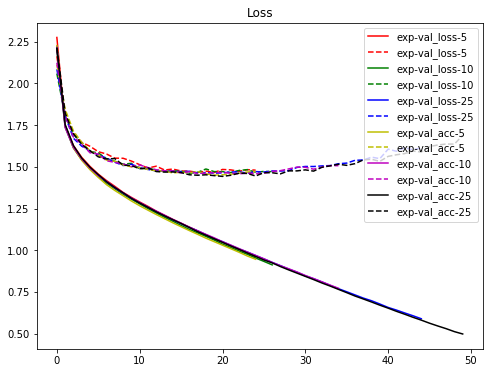

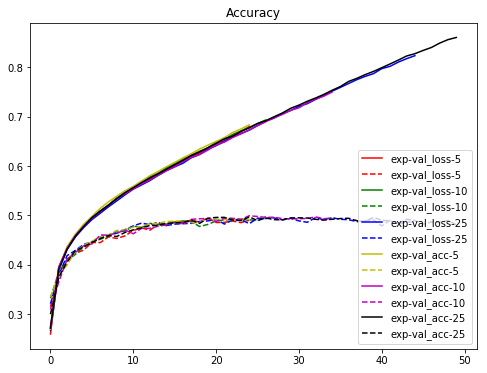

In [7]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

# 載入 Callbacks
"""Code Here
設定 callbacks: Earlystop
"""
from keras.callbacks import EarlyStopping
MONITOR = ['val_loss', 'val_acc']
PATIENCE = [5, 10, 25]

results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for monitor in MONITOR:
    for patience in PATIENCE:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with monitor=%s, patience=%s" % (monitor, patience))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        earlystop = EarlyStopping(monitor=monitor, 
                                  patience=patience,
                                  verbose=1
                                  )
        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  callbacks=[earlystop],
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "exp-%s-%s" % (monitor, patience)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}
plot_results(results)